#Code cell #1

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic_train.csv")
testinng = pd.read_csv("titanic_test.csv")

In [45]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
#training.?

training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
#Code cell 3
#view the first few rows of the data

training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-47-c97a4e316eb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training, x='Pclass', palette='viridis')


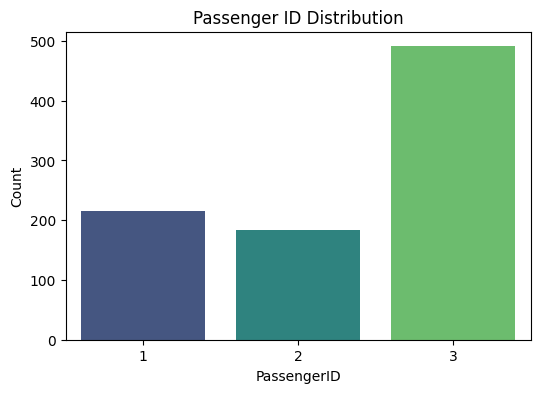

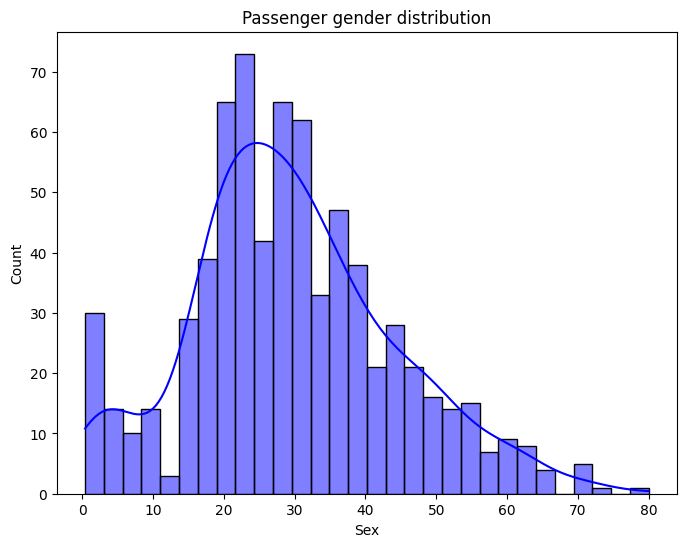

<ipython-input-47-c97a4e316eb2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=training, x= 'Survived', palette='Set1')


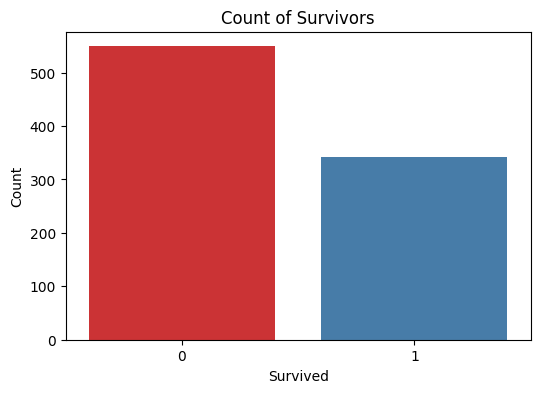

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=training, x='Pclass', palette='viridis')
plt.title('Passenger ID Distribution')
plt.xlabel('PassengerID')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(training['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Passenger gender distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=training, x= 'Survived', palette='Set1')
plt.title('Count of Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [48]:
#Perform Simple Linear Regression
data = training [['Fare', 'Survived']].dropna ()

# Split the data into X and y
X = data[['Fare']]
y= data['Survived']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score (y_test, y_pred)
print (f"Mean Squared Error: {mse:.2f}")
print (f"R-squared: {r2:.2f}")

Mean Squared Error: 0.22
R-squared: 0.08


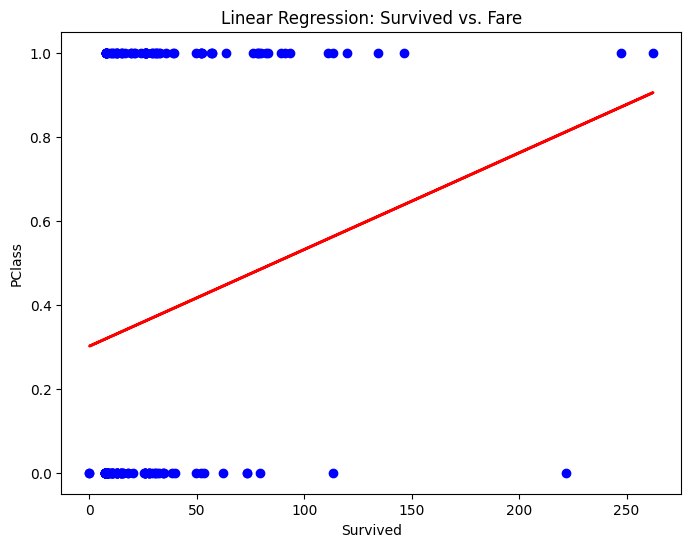

In [49]:
# Visualize the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter (X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Survived vs. Fare')
plt.xlabel('Survived')
plt.ylabel('PClass')
plt.show()

Mean Squared Error: 0.24
R-squared: -0.01


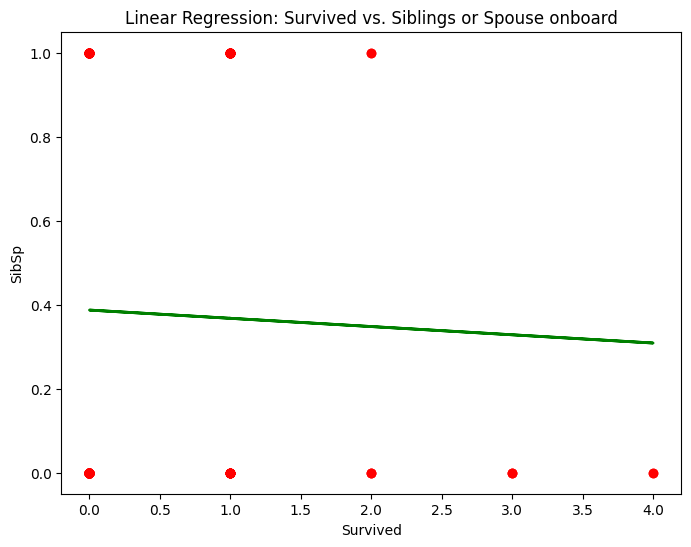

In [50]:
data = training [['SibSp', 'Survived']].dropna ()

# Split the data into X and y
X = data[['SibSp']]
y= data['Survived']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score (y_test, y_pred)
print (f"Mean Squared Error: {mse:.2f}")
print (f"R-squared: {r2:.2f}")

# Visualize the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter (X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.title('Linear Regression: Survived vs. Siblings or Spouse onboard')
plt.xlabel('Survived')
plt.ylabel('SibSp')
plt.show()

Mean Squared Error: 0.24
R-squared: 0.00


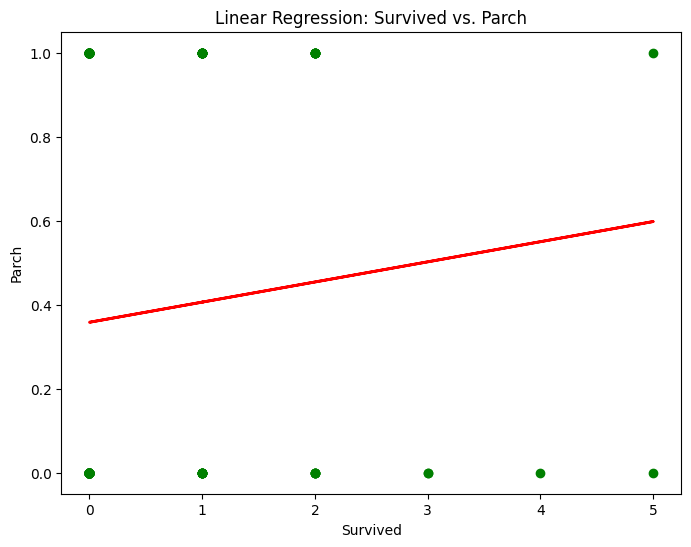

In [51]:
data = training [['Parch', 'Survived']].dropna ()

# Split the data into X and y
X = data[['Parch']]
y= data['Survived']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score (y_test, y_pred)
print (f"Mean Squared Error: {mse:.2f}")
print (f"R-squared: {r2:.2f}")

# Visualize the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter (X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Survived vs. Parch')
plt.xlabel('Survived')
plt.ylabel('Parch')
plt.show()

### PART 2

**Step 1: Create the dataframe**

**a) Import pandas and the csv file**

In [52]:
#Code cell 1
import pandas as pd
import numpy as np



#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic_train.csv")

In [53]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
#training.?

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Are there missing values in the data set?**


Yes, there is a lot of data in the values of the Titanic Train dataset.

In [54]:
#Code cell 3
#view the first few rows of the data

training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
print(training.columns)
#code cell 4
training["Sex"]= training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [56]:
#code cell 5
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#code cell 6
training['Age'].fillna(training['Age'].mean(), inplace=True)

In [58]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.

missing_age_count = training['Age'].isna().sum()
print("No. of missing values in 'Age' column: ", missing_age_count)

No. of missing values in 'Age' column:  0


**What is the value that was used to replace the missing ages**
- Fillna was employed to substitute for the absent ages.

In [59]:
#Use code to answer the question above
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


**Step 3: Train and Score the Decision Tree Model**

In [60]:
 #code cell 8
#create the array for the target values
y_target = training["Survived"].values


In [61]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [62]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [63]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

**Step 6: Visualize the Tree**

In [64]:
#code cell 12
from sklearn.tree import export_graphviz
dot_file_path = "titanic.dot"
with open(dot_file_path, 'w') as f:
  f = export_graphviz(clf_train, out_file=f, feature_names=columns)

In [65]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [66]:
#code cell 13
#run the Graphviz dot command to convert to convert the .dot file to .png
!dot -Tpng ./titanic.dot -o ./titanic.png

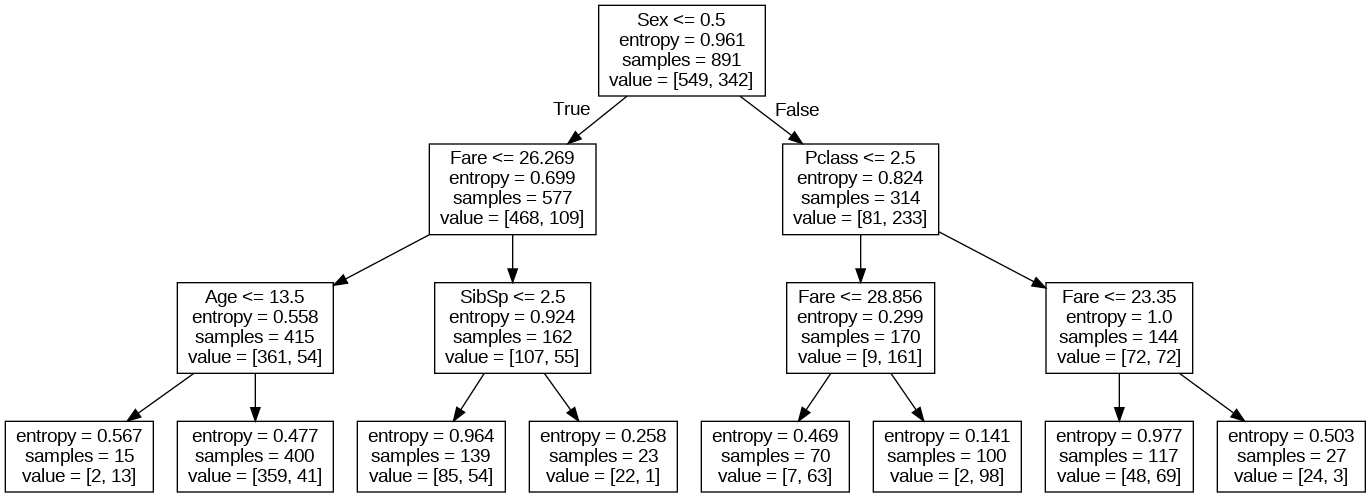

In [67]:
#code cell 14
#import the Image module from the Ipython.display library
from IPython.display import Image

Image(filename = "./titanic.png")

What describes the group that had the most deaths by number? Which group had the most survivors?

- In the sex category, males were the group with the highest mortality toll. Conversely, when it comes to survivors' age, the average age of survivors is higher than 13.5.


# Part 3

In [68]:
#code cell 15
#import the file into the 'testing' dataframe.
path = "titanic_test.csv"
testing = pd.read_csv(path)
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**How many records are in the data set?**

- 418

Which important variables(s) are missing values and how many are missing?

 - The number 86 is missing from the Age category. Conversely, the Fare category's missing value is 1.

In [69]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

In [71]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [72]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [73]:
#Code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)
#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})
testing.head(20)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.00000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.00000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.00000,2,0,A/4 48871,24.1500,NaN,S


In [74]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
path = "titanic_train.csv"
all_data = pd.read_csv(path)
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))
# Print the result
print(acc)


1.0


In [75]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
path = "titanic_train.csv"
all_data = pd.read_csv(path, usecols=['Survived','Pclass','Sex','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


**How many codes are in the data set**

- A total of 1308 entries

**Which important variables(s) are missing values and how many are missing?**

- In Age category, there are missing value of 177

In [76]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [77]:
#code cell 24
#replace missing Age values with the mean age
#display the first few rows of the data set
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)


In [78]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(["Fare", "Pclass", "Sex", "Age", "SibSp"])].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [81]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


In [80]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8277153558052435 Testing score = 0.803921568627451


# CONCLUSION

This activity helped me to know more of basics of this topic, I learned new information from this exercise on the use of decision tree classification, data processing, building and training models, and evaluating models. Overall, I learned how to analyze, and observe data sets.